# Final Evaluation

In [1]:
import warnings
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import joblib

warnings.filterwarnings("ignore")

%load_ext autoreload
%autoreload 2

In [2]:
# train_df = pd.read_csv('data/train_data.csv')
test_df = pd.read_csv('../data/processed/test_data.csv')

In [3]:
import pickle

with open("../saved_model/classifier/xgboost.pkl", "rb") as file:
    clf = pickle.load(file)

In [4]:
drop_col = ['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category', 
'first', 'last', 'street', 'city', 'state', 'zip', 'job', 'dob', 'unix_time', 
'job_category', 'trans_date', 'trans_num', 'is_fraud']
input_features = [col for col in test_df.columns if col not in drop_col]
target_feature = ['is_fraud']

In [ ]:
import os
import sys
# Add the src directory to the Python path
sys.path.append(os.path.abspath(os.path.join('..', 'src')))
from src.eval_metrics import fit_model_and_get_predictions

predictions_test = clf.predict_proba(test_df[input_features])[:, 1]  

In [14]:
predictions_test

array([2.7422625e-06, 4.7703707e-05, 4.1003887e-06, ..., 2.9728897e-06,
       6.1108781e-06, 2.0952156e-07], dtype=float32)

In [38]:
test_df['predictions']=(predictions_test>0.45).round()

In [39]:
from utils.eval_metrics import performance_assessment
performance_assessment(test_df)

,auc_roc,Average precision,F1 score
0,0.92,0.773,0.878


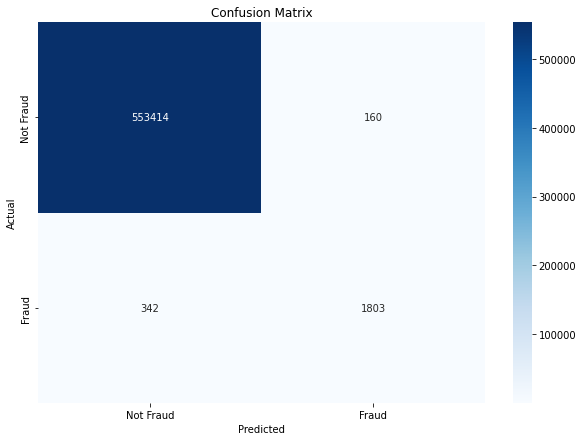

In [40]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt

# Compute confusion matrix
cm = confusion_matrix(test_df['is_fraud'], test_df['predictions'])

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()